In [38]:
import os
import cv2 as cv
import pandas as pd
import random
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPool2D,BatchNormalization,Flatten,Dropout
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train = "/kaggle/input/landscape-classification/intel-image-classification/train"
valid = "/kaggle/input/landscape-classification/intel-image-classification/validation"

In [4]:
Categories = ["buildings","forest","glacier","mountain","sea","street"]

In [5]:
data = []
def create_data(path_in):
    for categories in Categories:
        path = os.path.join(path_in , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data(train)

In [6]:
train_data = data

In [7]:
random.shuffle(train_data)

In [8]:
train_data[:4]

[[array([[216, 211, 199, ..., 241, 239, 238],
         [224, 226, 214, ..., 241, 239, 238],
         [229, 232, 228, ..., 242, 239, 237],
         ...,
         [115, 105,  89, ..., 178, 182, 172],
         [ 77,  64,  83, ..., 206, 175, 178],
         [103,  95,  84, ..., 188, 163, 175]], dtype=uint8),
  'sea'],
 [array([[ 4,  4, 11, ...,  1,  1,  0],
         [21,  6,  7, ...,  0,  0,  0],
         [42, 32,  7, ...,  1,  1,  1],
         ...,
         [34, 35, 32, ..., 38, 34, 26],
         [34, 31, 36, ..., 34, 35, 33],
         [27, 30, 33, ..., 37, 32, 34]], dtype=uint8),
  'street'],
 [array([[254, 253, 253, ..., 255, 255, 255],
         [252, 252, 252, ..., 255, 255, 255],
         [252, 252, 252, ..., 255, 255, 255],
         ...,
         [ 69,  50,  50, ...,  50,  39,  75],
         [ 46,  53,  51, ..., 123,  75,  21],
         [ 51,  47,  51, ..., 118, 102, 104]], dtype=uint8),
  'buildings'],
 [array([[66, 63, 53, ..., 30, 34, 31],
         [53, 61, 56, ..., 33, 37, 29],
  

In [9]:
data = []
def create_data(path_in):
    for categories in Categories:
        path = os.path.join(path_in , categories)
        class_name = categories
        for img in os.listdir(path):
            try:
                img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
                new_array = cv.resize(img_array , (100,100))
                data.append([new_array , class_name])
            except Exception as e:
                pass
create_data(valid)

In [10]:
valid_data = data

In [11]:
random.shuffle(valid_data)

In [12]:
len(valid_data)

2400

In [13]:
len(train_data)

6000

In [14]:
x_train = []
y_train = []
for features,labels in train_data:
    x_train.append(features)
    y_train.append(labels)

In [15]:
x_valid = []
y_valid = []
for features,labels in valid_data:
    x_valid.append(features)
    y_valid.append(labels)

In [16]:
x_train = np.array(x_train)
x_valid = np.array(x_valid)

In [17]:
x_train = x_train.reshape(6000,100,100,1)
x_valid = x_valid.reshape(2400,100,100,1)

In [18]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_valid = le.fit_transform(y_valid)

In [19]:
y_train[:10]

array([4, 5, 0, 1, 4, 0, 0, 3, 0, 4])

In [20]:
y_valid[:10]

array([0, 2, 3, 3, 0, 0, 4, 1, 0, 1])

In [21]:
x_train = x_train/255
x_valid = x_valid/255

In [34]:
model = Sequential()
model.add(Conv2D(100 , (3,3) , input_shape=(100,100,1) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(Conv2D(200 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(300 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(400 , (3,3) , activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(170 , activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(40,activation="relu"))
model.add(Dense(6 , activation="softmax"))

In [35]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 98, 98, 100)       1000      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 49, 49, 100)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 49, 49, 100)       0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 49, 49, 100)       400       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 47, 47, 200)       180200    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 23, 23, 200)       0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 23, 23, 200)      

In [36]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [37]:
history = model.fit(x_train,y_train,validation_data=(x_valid,y_valid),batch_size=120,epochs=100)

Epoch 1/100
50/50 [==============================] - 13s 190ms/step - loss: 1.8494 - accuracy: 0.3335 - val_loss: 1.8184 - val_accuracy: 0.1667
Epoch 2/100
50/50 [==============================] - 9s 187ms/step - loss: 1.3739 - accuracy: 0.4462 - val_loss: 1.9524 - val_accuracy: 0.1663
Epoch 3/100
50/50 [==============================] - 10s 195ms/step - loss: 1.3129 - accuracy: 0.4567 - val_loss: 2.4908 - val_accuracy: 0.1667
Epoch 4/100
50/50 [==============================] - 9s 188ms/step - loss: 1.1861 - accuracy: 0.4977 - val_loss: 1.5840 - val_accuracy: 0.2696
Epoch 5/100
50/50 [==============================] - 10s 194ms/step - loss: 1.0907 - accuracy: 0.5533 - val_loss: 1.5967 - val_accuracy: 0.3167
Epoch 6/100
50/50 [==============================] - 10s 192ms/step - loss: 1.0261 - accuracy: 0.5847 - val_loss: 1.9590 - val_accuracy: 0.1671
Epoch 7/100
50/50 [==============================] - 9s 183ms/step - loss: 1.0015 - accuracy: 0.6035 - val_loss: 3.2169 - val_accuracy: 0.

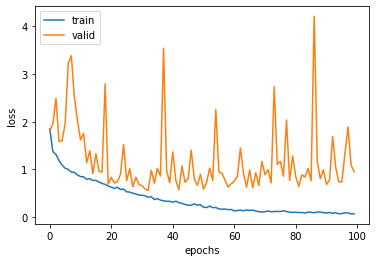

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","valid"])